<a href="https://colab.research.google.com/github/solee328/LikeLion_EDA/blob/heewon/policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

policy = pd.read_csv('/content/Policy.csv')


In [2]:
# policy data shape
print(policy.shape, len(policy.policy_id.unique())) 

(48, 7) 48


In [3]:
# data에 policy data 저장
data = policy.copy()

In [4]:
data.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


gov_policy에는 여러 값이 존재한다.

In [5]:
# data 
data['gov_policy'].unique()

array(['Infectious Disease Alert Level', 'Special Immigration Procedure',
       'Mandatory 14-day Self-Quarantine',
       'Mandatory Self-Quarantine & Diagonostic Tests',
       'Emergency Use Authorization of Diagnostic Kit',
       'Drive-Through Screening Center', 'Mask Distribution',
       'Social Distancing Campaign', 'Thanks to Challenge korea',
       'School Closure', 'School Opening Delay',
       'School Opening with Online Class', 'Open Data ', 'Open API',
       'Self-Diagnosis App', 'Self-Quarantine Safety Protection App',
       'Electronic Wristbands'], dtype=object)

우리가 집중할 정책인 거리두기 관련 부분

같은 Social Distancing Campaign이지만 detail의 차이의 존재 파악

In [6]:
data.loc[[28,29,30]]

,policy_id,country,type,gov_policy,detail,start_date,end_date
28,29,Korea,Social,Social Distancing Campaign,Strong,2020-03-22,2020-04-05
29,30,Korea,Social,Social Distancing Campaign,Strong,2020-04-06,2020-04-19
30,31,Korea,Social,Social Distancing Campaign,Weak,2020-04-20,2020-05-05


detail의 인덱스 값을 2020년 6월 28일부터 시행한 단계별 거리두기를 위해 Level 인덱스 값을 설정

In [7]:
for i in range (28,31):
  if data.loc[i,'detail'] =='Strong':
    data.loc[i,'detail'] = 2
  else:
    data.loc[i,'detail'] = 1
    
data['Level'] = data['detail']

우리가 data 값에서 필요한 정보인 gov_policy, Level, start_date와 end_date 인덱스 값들을 추출하여 따로 저장

In [8]:
data = data.loc[28:30, ['gov_policy', 'Level', 'start_date', 'end_date']]

새로운 정렬

In [9]:
data.reset_index(drop =True)

,gov_policy,Level,start_date,end_date
0,Social Distancing Campaign,2,2020-03-22,2020-04-05
1,Social Distancing Campaign,2,2020-04-06,2020-04-19
2,Social Distancing Campaign,1,2020-04-20,2020-05-05


추가 거리두기 관련 정책 데이터 추가

경기도 공식 블로그 참고

https://blog.naver.com/gyeonggi_gov/

In [10]:
data.loc[3] = [ 'Distancing in daily life', 1 , '2020-05-06', '2020-06-27'] # 생활속 거리두기 20.5.6-20.6.27
data.loc[4] = [ 'Social Distancing Campaign', 1, '2020-06-28', '2020-08-15'] # 단계별 적응 - 1단계 거리두기 20.6.28-20.8.15
data.loc[5] = [ 'Social Distancing Campaign', 2, '2020-08-16', '2020-08-29'] # 2단계 거리두기 20.8.16-20.8.29/ 8월 19일부터터터 완전한 거리두기
data.loc[6] = [ 'Social Distancing Campaign', 2.5, '2020-08-30', '2020-09-13'] # 강화 2단계 거리두기 20.8.30-20.9.13
data.loc[7] = [ 'Social Distancing Campaign', 2, '2020-09-14', '2020-10-11'] # 2단계 거리두기 20.9.14-20.10.11
data.loc[8] = [ 'Social Distancing Campaign', 1, '2020-10-12', '2020-11-18'] # 1단계 거리두기 20.10.12-20.11.23
data.loc[9] = [ 'Social Distancing Campaign', 1.5, '2020-11-19', '2020-11-23']
data.loc[10] = [ 'Social Distancing Campaign', 2, '2020-11-24', '2020-12-07'] # 2단계 거리두기 20.11.24-20.12.07
data.loc[11] = [ 'Social Distancing Campaign', 2.5, '2020-12-08', '2020-12-23'] # 2단계 거리두기 20.12.8-20.12.23 수도권은 2.5 비수도권 2
# data.loc[12] = [ 'Special Measures for Strengthening the Prevention of the Year-end and New Year' , '2020-12-24', '2021-04-11'] # 연말연시 방역강화 특별대책 20.12.24-
data.loc[12] = [ 'Social Distancing Campaign', 2.5, '2020-12-23', '2021-01-03'] # 5인이상 집합금지 시작작ata.loc[12] = [ 'Social Distancing Campaign', 2.5, '2021-12-23', '2021-01-03'] # 5인이상 집합금지 시작작
data.loc[13] = [ 'Social Distancing Campaign', 2.5, '2021-01-04', '2021-01-17']
data.loc[14] = [ 'Social Distancing Campaign', 2.5, '2021-01-18', '2021-01-31']
data.loc[15] = [ 'Social Distancing Campaign', 2.5, '2021-02-01', '2021-02-14']
data.loc[16] = [ 'Social Distancing Campaign', 2, '2021-02-15', '2021-02-28'] 
data.loc[17] = [ 'Social Distancing Campaign', 2, '2021-03-01', '2021-04-11']

# **연말연시 방역강화 특별대책 20.12.24-**

**2020년 12월 24일 - 2021년 1월 3일**

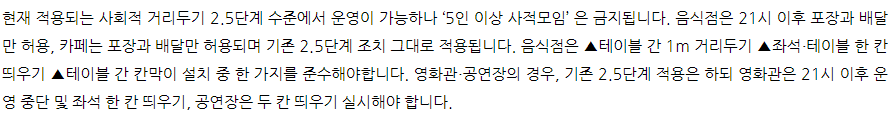

**1월 4일 - 1월 17일**

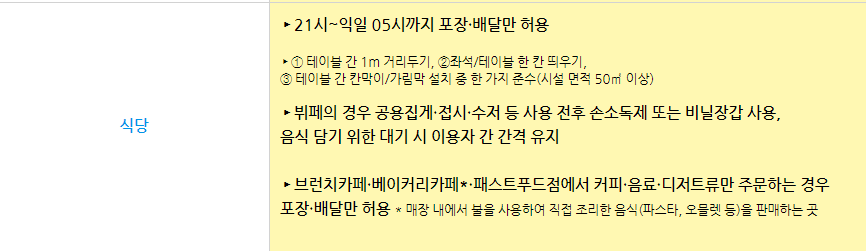

1월 18일 - 1월 31일

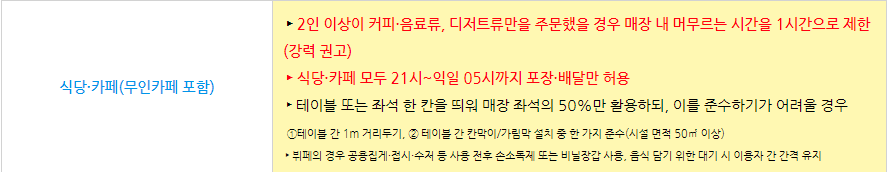

 **2월 1일 - 2월 14일**

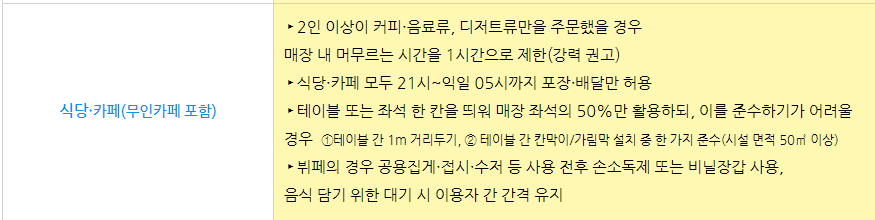

**2월 15일 - 2월 28일**

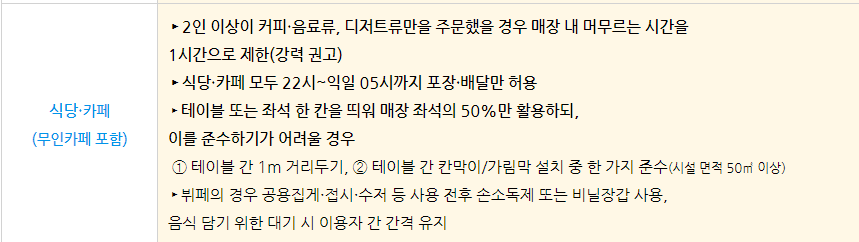

**3월 1일 - 3월 14일**

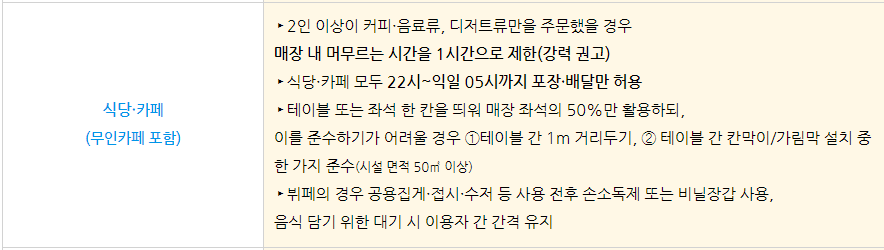

**3월 15일 - 3월 28일**

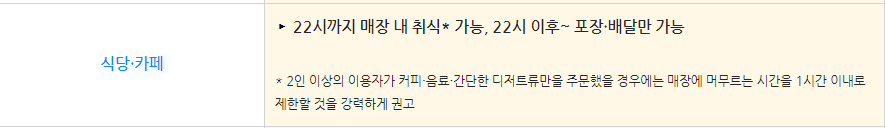

**3월 29일 - 4월 11일**

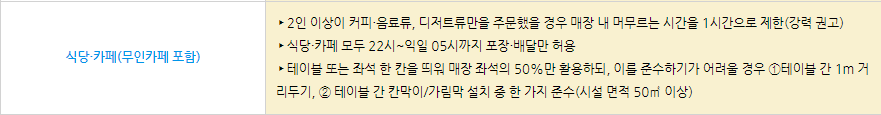

# **데이터 정리**

In [11]:
data.reset_index(drop =True)

,gov_policy,Level,start_date,end_date
0,Social Distancing Campaign,2,2020-03-22,2020-04-05
1,Social Distancing Campaign,2,2020-04-06,2020-04-19
2,Social Distancing Campaign,1,2020-04-20,2020-05-05
3,Distancing in daily life,1,2020-05-06,2020-06-27
4,Social Distancing Campaign,1,2020-06-28,2020-08-15
5,Social Distancing Campaign,2,2020-08-16,2020-08-29
6,Social Distancing Campaign,2.5,2020-08-30,2020-09-13
7,Social Distancing Campaign,2,2020-09-14,2020-10-11
8,Social Distancing Campaign,1,2020-10-12,2020-11-18
9,Social Distancing Campaign,1.5,2020-11-19,2020-11-23


In [12]:
data = data.reset_index(drop =True)

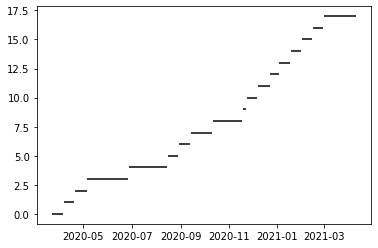

In [13]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt

start_date = pd.to_datetime(data.start_date)
end_date = pd.to_datetime(data.end_date)

fig = plt.figure()
ax = fig.add_subplot(111)
ax = ax.xaxis_date()
ax = plt.hlines(data.index, dt.date2num(start_date), dt.date2num(end_date))


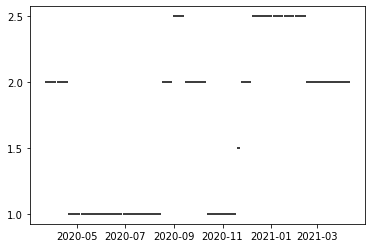

In [14]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt

start_date = pd.to_datetime(data.start_date)
end_date = pd.to_datetime(data.end_date)

fig = plt.figure()
ax = fig.add_subplot(111)
ax = ax.xaxis_date()
plt.yticks([1, 1.5, 2, 2.5])
ax = plt.hlines(data['Level'], dt.date2num(start_date), dt.date2num(end_date))

In [15]:
xlabel = []
# data.start_date = pd.to_datetime(data.start_date)
# data.end_date = pd.to_datetime(data.end_date)
for i in range (len(data['Level'])-1):
  if data.loc[i,'Level'] != data.loc[i+1,'Level']:
    xlabel.append(data.loc[i,'end_date'])
print(xlabel)

['2020-04-19', '2020-08-15', '2020-08-29', '2020-09-13', '2020-10-11', '2020-11-18', '2020-11-23', '2020-12-07', '2021-02-14']


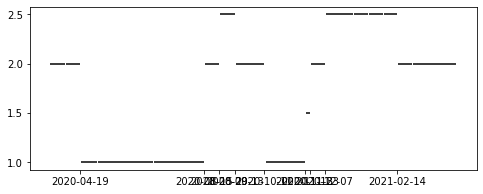

In [18]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)
ax = ax.xaxis_date()
xlabel = pd.to_datetime(xlabel)
plt.xticks(xlabel)
plt.yticks([1, 1.5, 2, 2.5])
ax = plt.hlines(data['Level'], dt.date2num(start_date), dt.date2num(end_date))

# **pyecharts 전 버전**

In [19]:
!pip install pyecharts==0.5.8

In [24]:
from pyecharts import Bar
from pyecharts import Line
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

# name = list(data.start_date)
# confirmed = list(data.Level)


# line = Line("거리두기 시작 날짜")

# line.add("확진자 수",name,confirmed, is_random=True, mark_point=['max'])

line = Line("코로나바이러스 확진자 추이")
line.add("누적 확진자", dt.date2num(start_date), data['Level'], mark_point = ["max"])
line.height = 600
line.weight = 1000
line

In [25]:
bar = Bar("거리두기 시작 날짜")
bar.add("거리두기 단계", data['start_date'], data['Level'], mark_point = ["max", "min"])
bar.height = 600
bar.weight = 800
bar

# **pyecharts 현 버전**

In [ ]:
# !pip install pyecharts

In [ ]:
'''
from pyecharts.charts import Line
from pyecharts import options as opts

# 
cate = ['Apple', 'Huawei', 'Xiaomi', 'Oppo', 'Vivo', 'Meizu']
data1 = [123, 153, 89, 107, 98, 23]
data2 = [56, 77, 93, 68, 45, 67]

"""
:
1. is_smooth  OR 
2. markline_opts  OR 
"""
line = (Line()
       .add_xaxis(cate)
       .add_yaxis('', data1, 
                  markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(type_="average")]))
       .add_yaxis('', data2, 
                  is_smooth=True, 
                  markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(name="", 
                                                                             coord=[cate[2], data2[2]], value=data2[2])]))
       .set_global_opts(title_opts=opts.TitleOpts(title="Line-", subtitle=""))
      )

line.render_notebook()
'''